Task 1 : Consider an image with 2 objects and a total of 3-pixel values (1 for each object and 
one for the background). Add Gaussian noise to the image. Implement and test Otsu’s 
algorithm with this image.

Import Required Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os


Create Synthetic Image with 2 Objects

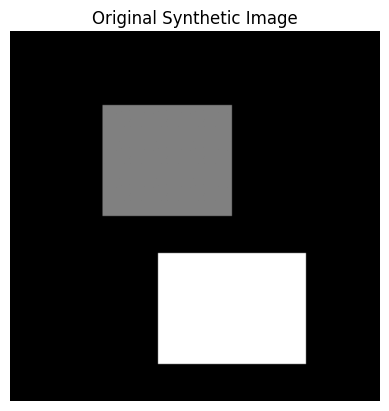

In [2]:
def create_synthetic_image(shape=(200, 200)):
    """
    Create a 3-level grayscale image with 2 square objects and background.
    Pixel values: 0 (background), 100 (object1), 200 (object2)
    """
    img = np.zeros(shape, dtype=np.uint8)

    # Draw first object (value 100)
    img[40:100, 50:120] = 100

    # Draw second object (value 200)
    img[120:180, 80:160] = 200

    return img

synthetic_img = create_synthetic_image()

plt.imshow(synthetic_img, cmap='gray')
plt.title("Original Synthetic Image")
plt.axis('off')
plt.show()


Add Gaussian Noise

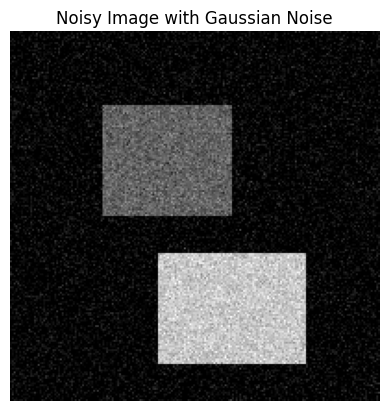

In [3]:
def add_gaussian_noise(image, mean=0, std=20):
    noise = np.random.normal(mean, std, image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 255)  # Keep in range
    return noisy_image.astype(np.uint8)

noisy_img = add_gaussian_noise(synthetic_img)

plt.imshow(noisy_img, cmap='gray')
plt.title("Noisy Image with Gaussian Noise")
plt.axis('off')
plt.show()


Apply Otsu’s Thresholding

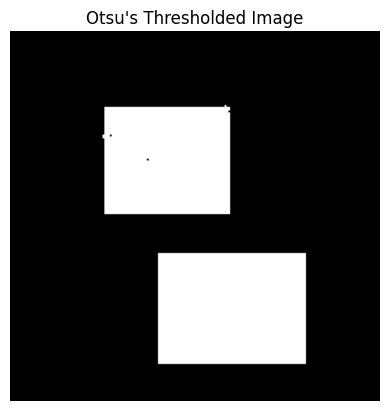

In [4]:
# Apply Gaussian blur before thresholding (optional but recommended)
blurred = cv2.GaussianBlur(noisy_img, (5, 5), 0)

# Otsu's thresholding
_, otsu_thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu's Thresholded Image")
plt.axis('off')
plt.show()


Save Outputs

In [5]:
output_dir = '../outputs/task1'
os.makedirs(output_dir, exist_ok=True)

cv2.imwrite(os.path.join(output_dir, 'synthetic_image.png'), synthetic_img)
cv2.imwrite(os.path.join(output_dir, 'noisy_image.png'), noisy_img)
cv2.imwrite(os.path.join(output_dir, 'otsu_result.png'), otsu_thresh)

print("Images saved in:", output_dir)


Images saved in: ../outputs/task1
